### Import

In [1]:
import numpy as np
import xarray as xr
from datetime import *
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn.colors.xkcd_rgb as c
import cmaps
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Case assigning

In [2]:
case_name = 'pbl_modVVM'

### Energy Time Series (Replot hw1)

In [3]:
ds_sfc = xr.open_mfdataset(f'/data/mlcloud/ch995334/VVM/DATA/{case_name}/archive/{case_name}.C.Surface*')

In [4]:
ds_rad = xr.open_mfdataset(f'/data/mlcloud/ch995334/VVM/DATA/{case_name}/archive/{case_name}.L.Radiation*')

In [5]:
# Surface flux of potential temperature
da_THF = ds_sfc.wth
# Surface flux of potential water vapor
da_QV  = ds_sfc.wqv

In [6]:
# Downward SW @ TOA
da_dsw = ds_rad.fdswtoa

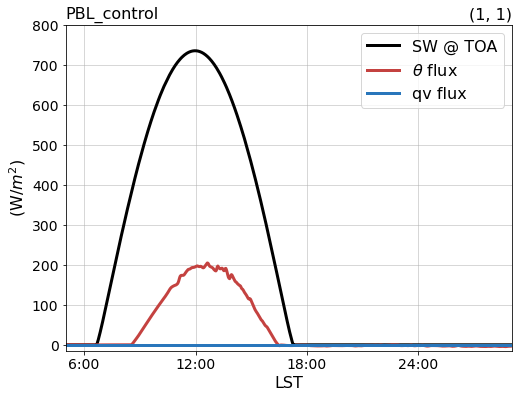

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(':', linewidth=0.5)
lsw     = ax.plot(np.arange(da_dsw.shape[0]), da_dsw[:, 0, 0], 'k', linewidth=3, label='SW @ TOA')
lth     = ax.plot(np.arange(da_THF.shape[0]), da_THF[:, 0, 0]*1004, c['reddish'], linewidth=3, label=r'$\theta$ flux')
lqv     = ax.plot(np.arange(da_QV.shape[0]), da_QV[:, 0, 0], c['bluish'], linewidth=3, label=r'qv flux')
ax.set_xlim(0, 721)
ax.set_xlabel('LST', fontsize=16)
ax.set_xticks((np.array([6, 12, 18, 24])-5)*30)
ax.set_xticklabels([f'{i}:00' for i in range(6, 25, 6)], fontsize=14)
ax.set_ylim(-15, 800)
ax.set_ylabel('(W/$m^{2}$)', fontsize=16)
ax.set_yticks(np.arange(0, 800.1, 100))
ax.set_yticklabels(np.arange(0, 800.1, 100).astype(int), fontsize=14)
ax.set_title('PBL_control', loc='left', fontsize=16)
ax.set_title('(1, 1)', loc='right', fontsize=16)
ax.legend(fontsize=16)
plt.savefig('/data/mlcloud/ch995334/hw/Figure/hw2/tseries_replot.png', facecolor='w', bbox_inches='tight', dpi=400)

### var profile (Replot hw1)

In [9]:
ds_dyn = xr.open_mfdataset(f'/data/mlcloud/ch995334/VVM/DATA/{case_name}/archive/{case_name}.L.Dynamic*')

In [10]:
ds_thm = xr.open_mfdataset(f'/data/mlcloud/ch995334/VVM/DATA/{case_name}/archive/{case_name}.L.Thermodynamic*')

In [11]:
da_u   = ds_dyn.u
da_v   = ds_dyn.v
da_w   = ds_dyn.w

In [12]:
da_t   = ds_thm.th
da_qv  = ds_thm.qv

In [13]:
level  = ds_dyn.lev

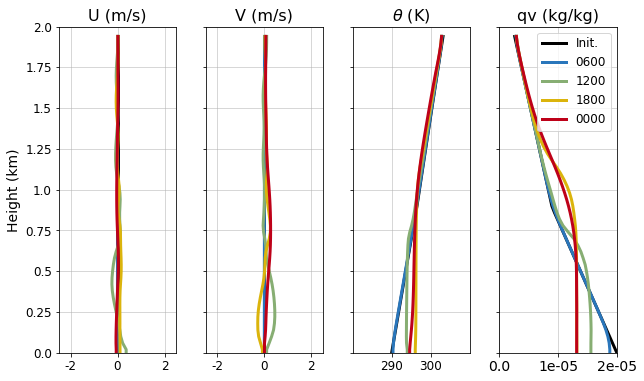

In [18]:
fig, ax = plt.subplots(1, 4, figsize=(10, 6), sharey=True, gridspec_kw={'wspace':0.25})
# Grid lines for all subplots
ax[0].grid(':', linewidth=0.5)
ax[1].grid(':', linewidth=0.5)
ax[2].grid(':', linewidth=0.5)
ax[3].grid(':', linewidth=0.5)
# Required time stamp (LST)
tstamp = np.insert((np.array([6, 12, 18, 24])-5)*30, 0, 0)
# Line label
llabel = ['Init.', '0600', '1200', '1800', '0000']
# Line color
lcolor = ['black', 'bluish', 'sage', 'gold', 'scarlet']
for tt in range(tstamp.shape[0]):
    # U plot
    ax[0].plot(da_u[tstamp[tt], :, 0, 0], level, linewidth=3, color=c[lcolor[tt]])
    # V plot
    ax[1].plot(da_v[tstamp[tt], :, 0, 0], level, linewidth=3, color=c[lcolor[tt]])
    # Theta plot
    ax[2].plot(da_t[tstamp[tt], :, 0, 0], level, linewidth=3, color=c[lcolor[tt]])
    # qv plot
    ax[3].plot(da_qv[tstamp[tt], :, 0, 0], level, linewidth=3, color=c[lcolor[tt]], label=llabel[tt])
# Info. settings
ax[3].legend(fontsize=12)
ax[0].set_title('U (m/s)', fontsize=16)
ax[0].set_ylim(0, 2)
ax[0].set_yticks(np.arange(0, 2.1, 0.25))
ax[0].set_yticklabels(np.arange(0, 2.1, 0.25), fontsize=12)
ax[0].set_ylabel('Height (km)', fontsize=14)
ax[0].set_xlim(-2.5, 2.5)
ax[0].set_xticks(np.arange(-2, 2.1, 2))
ax[0].set_xticklabels(np.arange(-2, 2.1, 2).astype(int), fontsize=12)
ax[1].set_title('V (m/s)', fontsize=16)
ax[1].set_xlim(-2.5, 2.5)
ax[1].set_xticks(np.arange(-2, 2.1, 2))
ax[1].set_xticklabels(np.arange(-2, 2.1, 2).astype(int), fontsize=12)
ax[2].set_title(r'$\theta$ (K)', fontsize=16)
ax[2].set_xlim(280, 310)
ax[2].set_xticks(np.array([290, 300]))
ax[2].set_xticklabels(np.array([290, 300]).astype(int), fontsize=12)
ax[3].set_title('qv (kg/kg)', fontsize=16)
ax[3].set_xlim(0, 2e-5)
ax[3].set_xticks(np.arange(0, 2.5e-5, 1e-5))
ax[3].set_xticklabels(np.arange(0, 2.5e-5, 1e-5), fontsize=14)
plt.savefig('/data/mlcloud/ch995334/hw/Figure/hw2/4profile_replot.png', facecolor='w', bbox_inches='tight', dpi=400)

### TKE Hovmoeller Diagram

In [19]:
tke = da_u**2+da_v**2+da_w**2

In [21]:
tke_mean = tke.mean(dim=['lat', 'lon'])

In [24]:
arr_tke_mean = tke_mean.values

In [26]:
arr_tke_mean.shape

(721, 50)

In [ ]:
tke_mean.time

#### PBL boundary 2: Height when theta=theta+0.5K

In [142]:
# Function to find the level where potential_temperature >= potential_temperature + 0.5
def find_level(pt, levels):
    # Iterate over levels and find the first level where pt >= pt[lev0] + 0.5
    target_temp = pt[0] + 0.5
    idx = np.argmax(pt >= target_temp, axis=0)
    
    # Set to 0 if no level satisfies the condition
    idx = np.where(np.any(pt >= target_temp, axis=0), idx, 0)
    return levels[idx]

In [143]:
# Apply the function using xr.apply_ufunc across the 'lev' dimension
da_t05 = xr.apply_ufunc(
    find_level,
    da_t,
    da_t.lev,
    input_core_dims=[['lev'], ['lev']],
    vectorize=True,  # Apply across all other dimensions
    dask="parallelized",  # Use Dask for larger datasets
    output_dtypes=[float]  # Output will be float
)

In [145]:
da_t05.values

KeyboardInterrupt: 

In [141]:
np.argmax(np.array([1, 1, 1, 2, 3, 4])>=1.5)

3

In [ ]:
da_t05.values

In [146]:
da_t05_mean = da_t05.mean(dim=['lat', 'lon'])

In [135]:
da_t05_mean

<xarray.DataArray (time: 721)>
dask.array<mean_agg-aggregate, shape=(721,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-01-01T00:02:00 ... 1900-01-02

#### PBL boundary 3: d_theta/dz max.

In [103]:
arr_th = da_t.values

In [106]:
arr_th_slope = (arr_th[:, 1:, ...]-arr_th[:, :-1, ...])/0.02

In [107]:
arr_slope_idx = np.argmax(arr_th_slope, axis=1)

In [108]:
arr_slope_idx.max()

48

In [109]:
arr_slope_idx.shape

(721, 128, 128)

In [113]:
slope_idx = xr.DataArray(arr_slope_idx, dims=['time', 'lat', 'lon'])

In [115]:
dthdz_pbl_meanH = da_t.lev.isel(lev=slope_idx).mean(dim=['lat', 'lon'])

In [ ]:
dthdz_pbl_meanH

#### Plot

FileNotFoundError: [Errno 2] No such file or directory: b'/data/mlcloud/ch995334/VVM/DATA/pbl_modVVM/archive/pbl_modVVM.L.Thermodynamic-000588.nc'

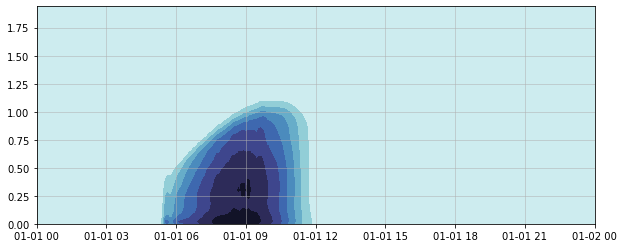

In [150]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.grid(':', linewidth=0.5)
# TKE
im = ax.contourf(tke_mean.time, tke_mean.lev, arr_tke_mean.T, cmap=cmaps.cmocean_ice_r)
###cs = ax.contour(tke_mean.time, tke_mean.lev, arr_tke_mean.T, levels=[0.25], colors='k', linewidths=3)
# Theta+0.5
ax.plot(tke_mean.time, da_t05_mean, color='grey', linewidth=3, label='Theta + 0.5K')
# max. theta variability
ax.plot(tke_mean.time, dthdz_pbl_meanH, color=c['crimson'], linewidth=3, label=r'd$\theta$/dz max.')
# Info settings
ax.set_xticks(tke_mean.time[::90])
ax.set_xticklabels([f'{tke_mean.time.dt.hour[i]:02d}:{tke.time.dt.minute[i]:02d}' for i in range(0, tke_mean.shape[0], 90)], 
                   fontsize=13)
ax.set_xlabel('Run time', fontsize=14)
ax.set_yticks(np.arange(0, 1.9, 0.25))
ax.set_yticklabels(np.arange(0, 1.9, 0.25), fontsize=13)
ax.set_ylabel('Height (km)', fontsize=14)
ax.legend(fontsize=14)
ax.set_title('PBL Height', fontsize=16)
ax.set_title('Domain-averaged', loc='right', fontsize=12)

cbar = fig.colorbar(im)
cbar.set_ticks(ticks=np.arange(0, 2.1, 0.25), labels=np.arange(0, 2.1, 0.25))
cbar.ax.tick_params(labelsize=13)
cbar.set_label('TKE ($m^{2}/s^{2}$)', fontsize=14)
plt.savefig('./Figure/pbl_height_tke.png')

### Enstrophy Hovmoeller Diagram

In [44]:
da_xi   = ds_dyn['xi']
da_eta  = ds_dyn['eta']
da_zeta = ds_dyn['zeta']

In [55]:
da_enst = da_xi**2+da_eta**2+da_zeta**2

In [56]:
da_enst_mean = da_enst.mean(dim=['lat', 'lon'])

In [57]:
arr_enst_mean= da_enst_mean.values

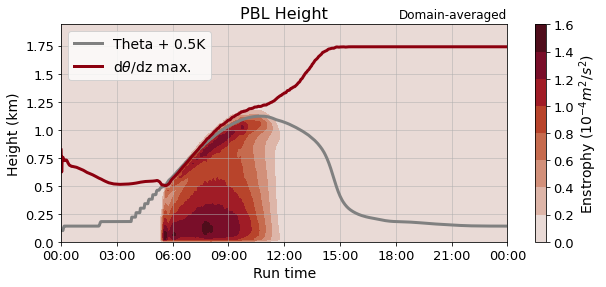

In [149]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.grid(':', linewidth=0.5)
# Enstrophy
im = ax.contourf(da_enst_mean.time, da_enst_mean.lev, arr_enst_mean.T, cmap=cmaps.cmocean_amp)
# Theta+0.5
ax.plot(tke_mean.time, da_t05_mean, color='grey', linewidth=3, label='Theta + 0.5K')
# max. theta variability
ax.plot(tke_mean.time, dthdz_pbl_meanH, color=c['crimson'], linewidth=3, label=r'd$\theta$/dz max.')
# Info settings
ax.set_xticks(da_enst_mean.time[::90])
ax.set_xticklabels([f'{da_enst_mean.time.dt.hour[i]:02d}:{da_enst_mean.time.dt.minute[i]:02d}' for i in range(0, da_enst_mean.shape[0], 90)], 
                   fontsize=13)
ax.set_xlabel('Run time', fontsize=14)
ax.set_yticks(np.arange(0, 1.9, 0.25))
ax.set_yticklabels(np.arange(0, 1.9, 0.25), fontsize=13)
ax.set_ylabel('Height (km)', fontsize=14)
ax.legend(fontsize=14)
ax.set_title('PBL Height', fontsize=16)
ax.set_title('Domain-averaged', loc='right', fontsize=12)

cbar = fig.colorbar(im)
cbar.set_ticks(ticks=np.arange(0, 1.61e-4, 2e-5), labels=[f'{i:3.1f}' for i in np.arange(0, 1.61, 0.2)])
cbar.ax.tick_params(labelsize=13)
cbar.set_label('Enstrophy ($10^{-4} s^{-2}$)', fontsize=14)
plt.savefig('./Figure/pbl_height_enstrophy.png')

### 2D map @ 1000m (-> animation)
** Haven't replot this one**

In [22]:
# 1000m = level 26 (python idx 25)
pi1000 = 0.967    #T=theta*pi

In [23]:
# Field 1000m
u1000 = da_u.isel(lev=25)
v1000 = da_v.isel(lev=25)
w1000 = da_w.isel(lev=25)
qv1000= da_qv.isel(lev=25)
T1000 = da_t.isel(lev=25)*pi1000

In [58]:
datetest = datetime(2024, 1, 1, 5, 0, 0)
datenew  = datetest+timedelta(minutes=1)
print(datetest, datenew)
print(datenew.strftime('%H:%M'))

2024-01-01 05:00:00 2024-01-01 05:01:00
05:01


In [ ]:
# Wind field 1000m
time_now    = datetime(2024, 1, 1, 5, 0, 0)
for tt in range(u1000.shape[0]):
    fig, ax = plt.subplots(figsize=(6, 6))
    imw     = ax.imshow(w1000[tt, ...], vmin=-2, vmax=2, origin='lower', cmap=cmaps.MPL_RdBu)
    ax.quiver(np.arange(128)[::4], np.arange(128)[::4], u1000[tt, ::4, ::4], v1000[tt, ::4, ::4])
    cax     = fig.add_axes([ax.get_position().x1+0.015, ax.get_position().y0, 0.02, ax.get_position().height])
    cbar    = fig.colorbar(imw, cax=cax, extend='both')
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label(label='w (m/s)', fontsize=14)
    ax.set_xticks(np.arange(0, 128.1, 40))
    ax.set_xticklabels(np.arange(0, 128.1, 40)*0.2, fontsize=14)
    ax.set_xlabel('km', fontsize=14)
    ax.set_yticks(np.arange(0, 128.1, 40))
    ax.set_yticklabels(np.arange(0, 128.1, 40)*0.2, fontsize=14)
    ax.set_ylabel('km', fontsize=14)
    ax.set_title('Wind Field @ 1000m', loc='left', fontsize=16)
    ax.set_title(time_now.strftime('%H:%M'), loc='right', fontsize=16)
    plt.savefig(f'/data/mlcloud/ch995334/hw1/wind_animation/dt5_{time_now.strftime("%d%H%M")}.png', 
                facecolor='w', bbox_inches='tight', dpi=400)
    time_now= time_now+timedelta(minutes=1)

In [ ]:
# Temp. field 1000m
time_now    = datetime(2024, 1, 1, 5, 0, 0)
for tt in range(u1000.shape[0]):
    fig, ax = plt.subplots(figsize=(6, 6))
    imT     = ax.imshow(T1000[tt, ...], vmin=286.6, vmax=287.6, origin='lower', cmap=cmaps.cmocean_matter)
    cax     = fig.add_axes([ax.get_position().x1+0.015, ax.get_position().y0, 0.02, ax.get_position().height])
    cbar    = fig.colorbar(imT, cax=cax, extend='both')
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label(label='T (K)', fontsize=14)
    ax.set_xticks(np.arange(0, 128.1, 40))
    ax.set_xticklabels(np.arange(0, 128.1, 40)*0.2, fontsize=14)
    ax.set_xlabel('km', fontsize=14)
    ax.set_yticks(np.arange(0, 128.1, 40))
    ax.set_yticklabels(np.arange(0, 128.1, 40)*0.2, fontsize=14)
    ax.set_ylabel('km', fontsize=14)
    ax.set_title('Temp. Field @ 1000m', loc='left', fontsize=16)
    ax.set_title(time_now.strftime('%H:%M'), loc='right', fontsize=16)
    plt.savefig(f'/data/mlcloud/ch995334/hw1/T_animation/dt5_{time_now.strftime("%d%H%M")}.png', 
                facecolor='w', bbox_inches='tight', dpi=400)
    time_now= time_now+timedelta(minutes=1)

In [ ]:
# qv field 1000m
time_now    = datetime(2024, 1, 1, 5, 0, 0)
for tt in range(u1000.shape[0]):
    fig, ax = plt.subplots(figsize=(6, 6))
    imT     = ax.imshow(T1000[tt, ...], vmin=286.6, vmax=287.6, origin='lower', cmap=cmaps.cmocean_matter)
    cax     = fig.add_axes([ax.get_position().x1+0.015, ax.get_position().y0, 0.02, ax.get_position().height])
    cbar    = fig.colorbar(imT, cax=cax, extend='both')
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label(label='T (K)', fontsize=14)
    ax.set_xticks(np.arange(0, 128.1, 40))
    ax.set_xticklabels(np.arange(0, 128.1, 40)*0.2, fontsize=14)
    ax.set_xlabel('km', fontsize=14)
    ax.set_yticks(np.arange(0, 128.1, 40))
    ax.set_yticklabels(np.arange(0, 128.1, 40)*0.2, fontsize=14)
    ax.set_ylabel('km', fontsize=14)
    ax.set_title('Temp. Field @ 1000m', loc='left', fontsize=16)
    ax.set_title(time_now.strftime('%H:%M'), loc='right', fontsize=16)
    plt.savefig(f'/data/mlcloud/ch995334/hw1/T_animation/dt5_{time_now.strftime("%d%H%M")}.png', 
                facecolor='w', bbox_inches='tight', dpi=400)
    time_now= time_now+timedelta(minutes=1)

/tmp/ipykernel_963910/1527725687.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(6, 6))


### Test